In [1]:
import findspark
findspark.init()

In [2]:
import pandas as pd

In [3]:
import pyspark
from pyspark.context import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
sc = SparkContext.getOrCreate()
spark = SparkSession.builder.getOrCreate()
print(sc.version)
print(spark.version)

2.4.7
2.4.7


In [ ]:
conf = pyspark.SparkConf().set("spark.jars.packages", 
                              "org.mongodb.spark:mongo-spark-connector_2.12:3.0.1").setMaster("local").setAppName("App").setAll([("spark.driver.memory","40g"),("spark.executor.memory","50g")])

In [ ]:
sc = SparkContext(conf = conf)

In [ ]:
sqlC = SQLContext(sc)

In [ ]:
mongo_ip = "mongodb://localhost:27017/ece552Group18."

In [ ]:
la_crime_df = sqlC.read.format("com.mongodb.spark.sql.DefaultSource").option("uri", mongo_ip + "la_crime").load()

In [ ]:
la_crime_df.createOrReplaceTempView("la_crime_df")

In [4]:
%%time

dirPath = ""
fileName = "LA_Crime.csv"

Wall time: 0 ns


In [5]:
la_crime_df = spark.read.format("csv"). \
                option("header", "true").option("mode", "DROPMALFORMED").option("delimiter",","). \
            option("ignoreLeadingWhiteSpace","true").option("ignoreTrailingWhiteSpace","true"). \
option("inferschema","true").\
load(dirPath + fileName)

In [6]:
la_crime_df.show(5)

+---------+--------------+--------------+--------+----+-----------+-----------+--------+------+--------------------+--------------+--------+--------+------------+---------+--------------------+--------------+--------------------+------+------------+--------+--------+--------+--------+--------------------+------------+-------+---------+
|    DR_NO|     Date_Rptd|      DATE OCC|TIME OCC|AREA|  AREA NAME|Rpt Dist No|Part 1-2|Crm Cd|         Crm Cd Desc|       Mocodes|Vict Age|Vict Sex|Vict Descent|Premis Cd|         Premis Desc|Weapon Used Cd|         Weapon Desc|Status| Status Desc|Crm Cd 1|Crm Cd 2|Crm Cd 3|Crm Cd 4|            LOCATION|Cross Street|    LAT|      LON|
+---------+--------------+--------------+--------+----+-----------+-----------+--------+------+--------------------+--------------+--------+--------+------------+---------+--------------------+--------------+--------------------+------+------------+--------+--------+--------+--------+--------------------+------------+-----

In [7]:
la_crime_df.printSchema()

root
 |-- DR_NO: integer (nullable = true)
 |-- Date_Rptd: string (nullable = true)
 |-- DATE OCC: string (nullable = true)
 |-- TIME OCC: integer (nullable = true)
 |-- AREA: integer (nullable = true)
 |-- AREA NAME: string (nullable = true)
 |-- Rpt Dist No: integer (nullable = true)
 |-- Part 1-2: integer (nullable = true)
 |-- Crm Cd: integer (nullable = true)
 |-- Crm Cd Desc: string (nullable = true)
 |-- Mocodes: string (nullable = true)
 |-- Vict Age: integer (nullable = true)
 |-- Vict Sex: string (nullable = true)
 |-- Vict Descent: string (nullable = true)
 |-- Premis Cd: integer (nullable = true)
 |-- Premis Desc: string (nullable = true)
 |-- Weapon Used Cd: integer (nullable = true)
 |-- Weapon Desc: string (nullable = true)
 |-- Status: string (nullable = true)
 |-- Status Desc: string (nullable = true)
 |-- Crm Cd 1: integer (nullable = true)
 |-- Crm Cd 2: integer (nullable = true)
 |-- Crm Cd 3: integer (nullable = true)
 |-- Crm Cd 4: integer (nullable = true)
 |-- L

In [8]:
la_crime_df.count()

608592

In [6]:
la_crime_df = la_crime_df.drop("DR_NO","Part 1-2","Mocodes","Vict Descent",
                               "Status","Crm Cd 1","Crm Cd 2",
                               "Crm Cd 3","Crm Cd 4","LOCATION","Cross Street",
                               "LAT","LON") 
                 
la_crime_df.printSchema()

root
 |-- Date_Rptd: string (nullable = true)
 |-- DATE OCC: string (nullable = true)
 |-- TIME OCC: integer (nullable = true)
 |-- AREA: integer (nullable = true)
 |-- AREA NAME: string (nullable = true)
 |-- Rpt Dist No: integer (nullable = true)
 |-- Crm Cd: integer (nullable = true)
 |-- Crm Cd Desc: string (nullable = true)
 |-- Vict Age: integer (nullable = true)
 |-- Vict Sex: string (nullable = true)
 |-- Premis Cd: integer (nullable = true)
 |-- Premis Desc: string (nullable = true)
 |-- Weapon Used Cd: integer (nullable = true)
 |-- Weapon Desc: string (nullable = true)
 |-- Status Desc: string (nullable = true)



In [7]:
la_crime_df = la_crime_df.withColumnRenamed("Date_Rptd","Date_Reported") \
.withColumnRenamed("DATE OCC","Date_Occurred") \
.withColumnRenamed("TIME OCC","Time_Occurred") \
.withColumnRenamed("AREA NAME","Area_Name") \
.withColumnRenamed("Rpt Dist No","Reported_District_No") \
.withColumnRenamed("Crm Cd","Crime_Code") \
.withColumnRenamed("Crm Cd Desc","Crime_Code_Description") \
.withColumnRenamed("Vict Age","Victim_Age") \
.withColumnRenamed("Vict Sex","Victim_Sex") \
.withColumnRenamed("Premis Cd","Premises_Code") \
.withColumnRenamed("Premis Desc","Premises_Description") \
.withColumnRenamed("Weapon Used Cd","Weapon_Used_Code") \
.withColumnRenamed("Weapon Desc","Weapon_Description") \
.withColumnRenamed("Status Desc","Status_Description")

la_crime_df.printSchema()

root
 |-- Date_Reported: string (nullable = true)
 |-- Date_Occurred: string (nullable = true)
 |-- Time_Occurred: integer (nullable = true)
 |-- AREA: integer (nullable = true)
 |-- Area_Name: string (nullable = true)
 |-- Reported_District_No: integer (nullable = true)
 |-- Crime_Code: integer (nullable = true)
 |-- Crime_Code_Description: string (nullable = true)
 |-- Victim_Age: integer (nullable = true)
 |-- Victim_Sex: string (nullable = true)
 |-- Premises_Code: integer (nullable = true)
 |-- Premises_Description: string (nullable = true)
 |-- Weapon_Used_Code: integer (nullable = true)
 |-- Weapon_Description: string (nullable = true)
 |-- Status_Description: string (nullable = true)



In [8]:
la_crime_df.write.parquet("C:/BigData/~notebookJupyter/crime.parquet")

In [9]:
la_crime_parquet = spark.read.parquet("C:/BigData/~notebookJupyter/crime.parquet")

In [13]:
la_crime_parquet.printSchema()

root
 |-- Date_Reported: string (nullable = true)
 |-- Date_Occurred: string (nullable = true)
 |-- Time_Occurred: integer (nullable = true)
 |-- AREA: integer (nullable = true)
 |-- Area_Name: string (nullable = true)
 |-- Reported_District_No: integer (nullable = true)
 |-- Crime_Code: integer (nullable = true)
 |-- Crime_Code_Description: string (nullable = true)
 |-- Victim_Age: integer (nullable = true)
 |-- Victim_Sex: string (nullable = true)
 |-- Premises_Code: integer (nullable = true)
 |-- Premises_Description: string (nullable = true)
 |-- Weapon_Used_Code: integer (nullable = true)
 |-- Weapon_Description: string (nullable = true)
 |-- Status_Description: string (nullable = true)



In [10]:
la_crime_parquet = la_crime_parquet.dropna()

la_crime_parquet.count()

215159

In [15]:
from pyspark.sql.functions import desc

In [16]:
#•	What demographics do majority of the victims fall under?

age = la_crime_parquet.groupBy("Victim_Age").count()
age.sort(desc("count")).show()

sex = la_crime_parquet.groupBy("Victim_Sex").count()
sex.sort(desc("count")).show()

+----------+-----+
|Victim_Age|count|
+----------+-----+
|         0|17045|
|        30| 6070|
|        25| 5711|
|        29| 5681|
|        28| 5670|
|        27| 5658|
|        26| 5651|
|        31| 5575|
|        32| 5274|
|        24| 5212|
|        35| 5133|
|        33| 5110|
|        23| 4967|
|        34| 4846|
|        36| 4676|
|        22| 4621|
|        37| 4439|
|        21| 4434|
|        38| 4320|
|        20| 4300|
+----------+-----+
only showing top 20 rows

+----------+------+
|Victim_Sex| count|
+----------+------+
|         M|104402|
|         F| 98496|
|         X| 12239|
|         H|    22|
+----------+------+



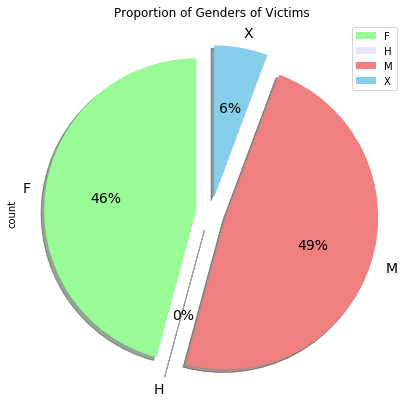

In [17]:
sex_pandas = sex.toPandas()

explode = (0.1,0.1,0.1,0.1)
sex_pandas.groupby(['Victim_Sex']).sum().plot(kind='pie', y='count', autopct='%1.0f%%',
                                colors = ['Palegreen','Lavender','Lightcoral','Skyblue'],
                                explode = explode,
                                shadow = True,
                                figsize=(10, 7),
                                textprops={'fontsize': 14},
                                startangle = 90,
                                title='Proportion of Genders of Victims')

In [18]:
#•	What type of crime was committed more frequently?

crime = la_crime_parquet.groupBy("Crime_Code", "Crime_Code_Description").count()

crime.sort(desc("count")).show()

+----------+----------------------+-----+
|Crime_Code|Crime_Code_Description|count|
+----------+----------------------+-----+
|       624|  BATTERY - SIMPLE ...|48604|
|       230|  ASSAULT WITH DEAD...|35840|
|       626|  INTIMATE PARTNER ...|31341|
|       210|               ROBBERY|21353|
|       930|  CRIMINAL THREATS ...|12623|
|       761|       BRANDISH WEAPON| 9576|
|       236|  INTIMATE PARTNER ...| 8486|
|       310|              BURGLARY| 4261|
|       740|  VANDALISM - FELON...| 4059|
|       220|     ATTEMPTED ROBBERY| 3325|
|       625|         OTHER ASSAULT| 2921|
|       860|  BATTERY WITH SEXU...| 2736|
|       121|        RAPE, FORCIBLE| 2414|
|       627|  CHILD ABUSE (PHYS...| 2245|
|       330|  BURGLARY FROM VEH...| 2029|
|       745|  VANDALISM - MISDE...| 1894|
|       753|  DISCHARGE FIREARM...| 1803|
|       623|  BATTERY POLICE (S...| 1750|
|       251|  SHOTS FIRED AT IN...| 1185|
|       350|         THEFT, PERSON| 1174|
+----------+----------------------

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114]),
 <a list of 115 Text yticklabel objects>)

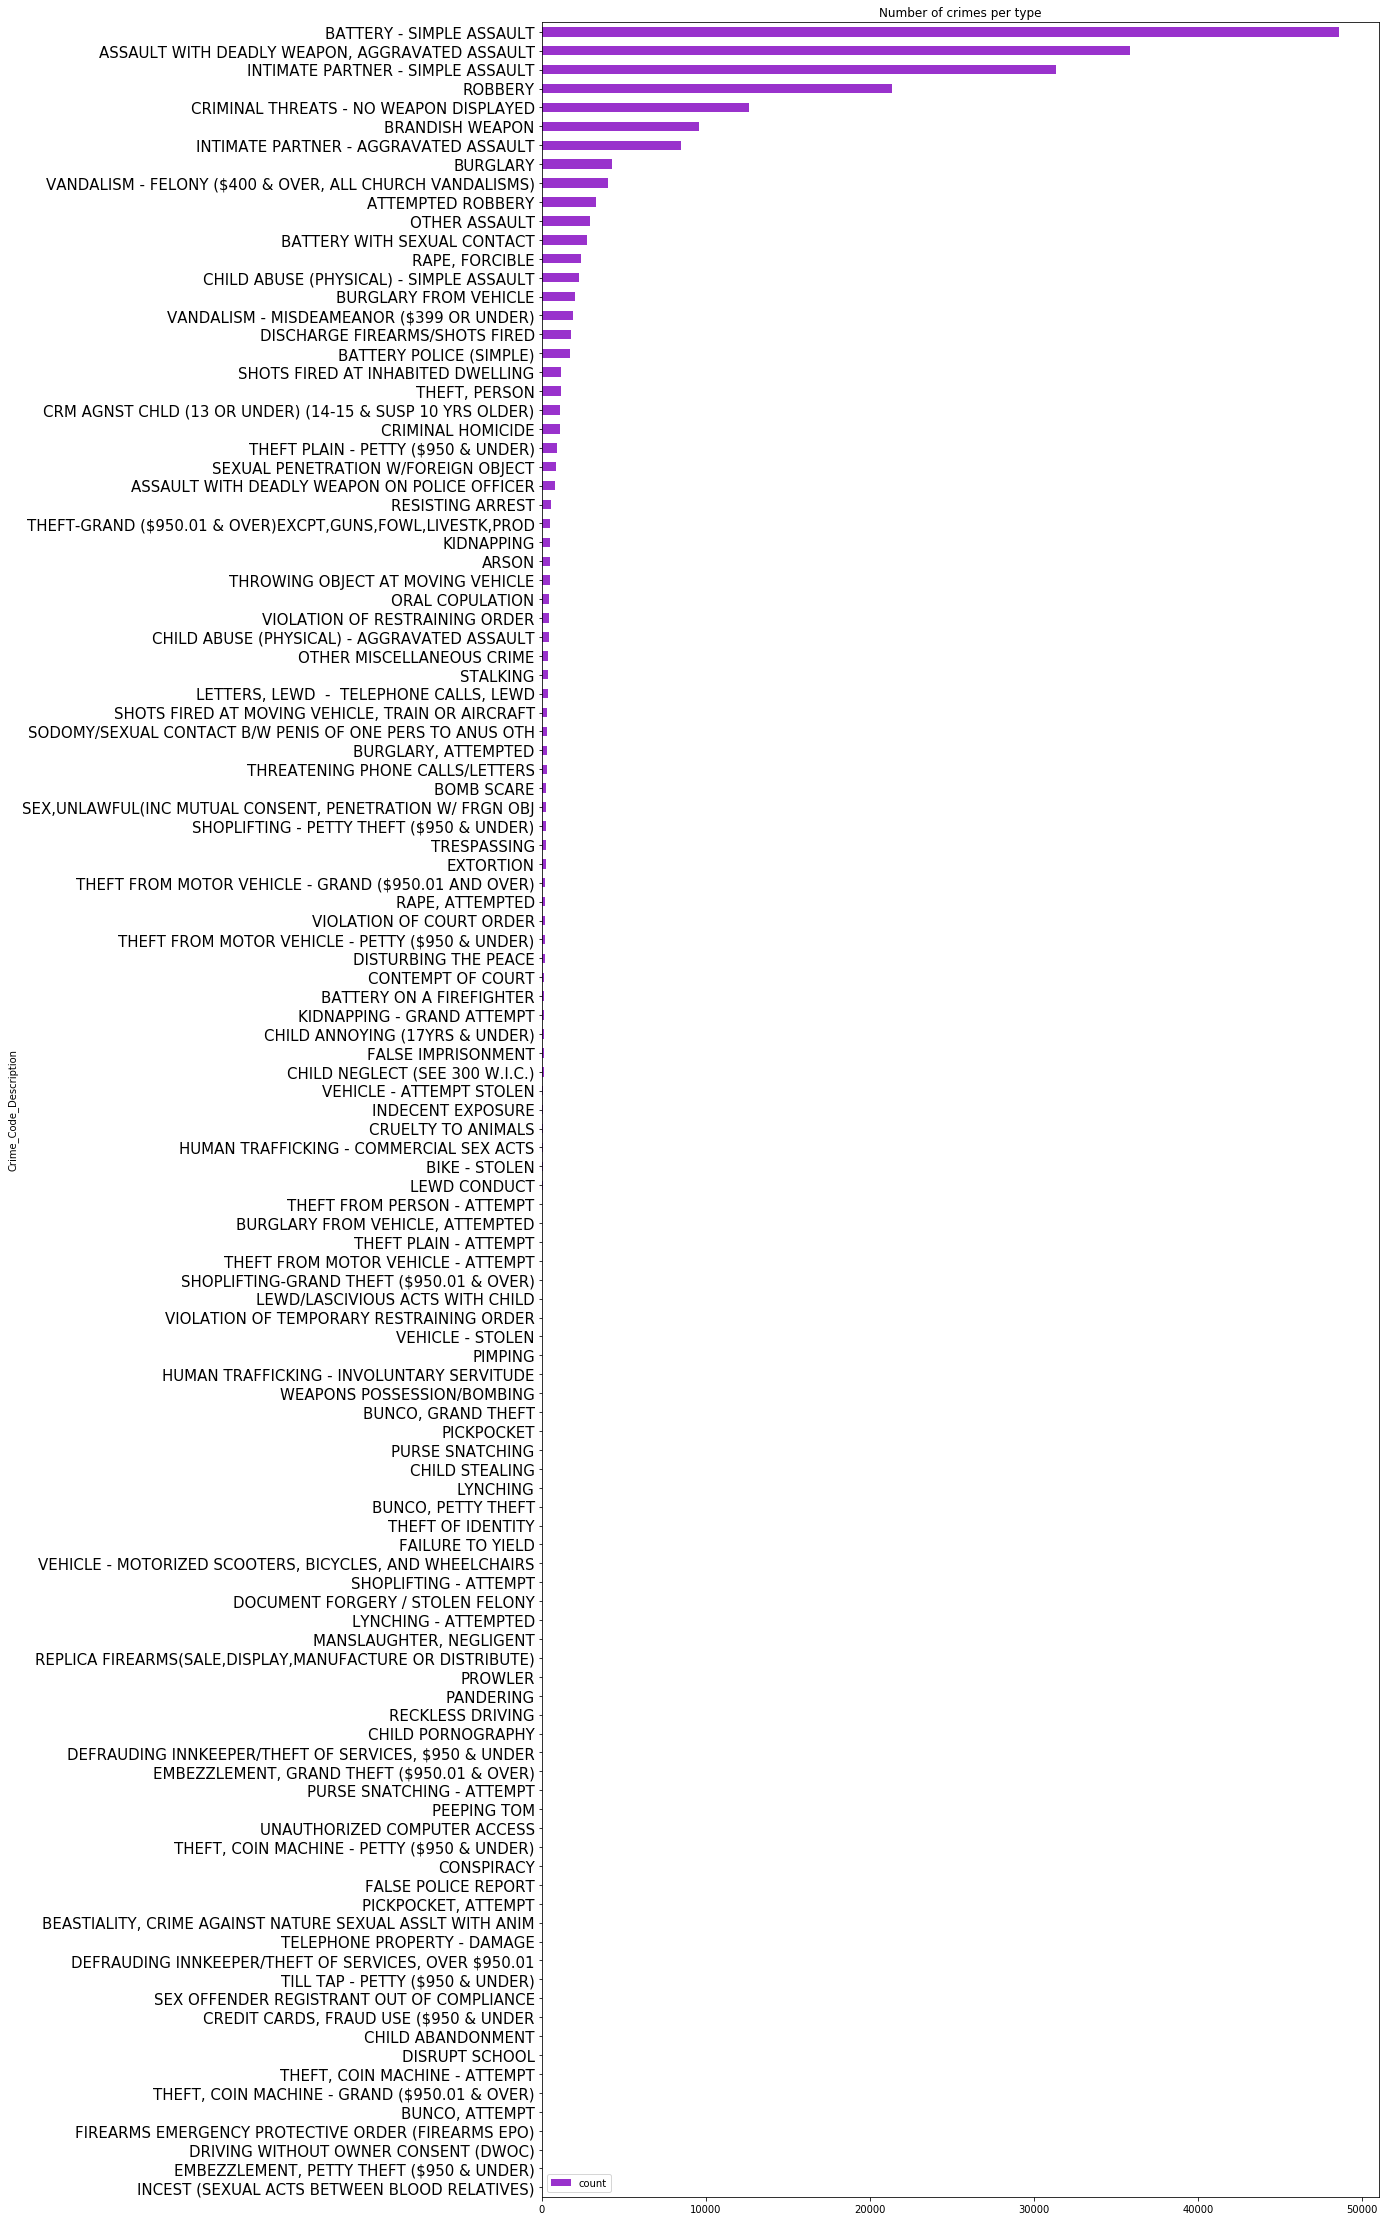

In [29]:
import matplotlib.pyplot as plt

crime_pandas = crime.toPandas()

crime_pandas_sorted = crime_pandas.sort_values('count')
crime_pandas_sorted.plot.barh(x='Crime_Code_Description', y='count',
              title='Number of crimes per type', color='darkorchid', figsize=(15, 40))
plt.yticks(fontsize = 15)

In [19]:
#•	What premises have more crimes been committed in?

premise = la_crime_parquet.groupBy("Premises_Description").count()
premise.sort(desc("count")).show()

area = la_crime_parquet.groupBy("Area_Name").count()
area.sort(desc("count")).show()

+--------------------+-----+
|Premises_Description|count|
+--------------------+-----+
|              STREET|45990|
|SINGLE FAMILY DWE...|39172|
|MULTI-UNIT DWELLI...|36244|
|            SIDEWALK|21748|
|         PARKING LOT|12185|
|      OTHER BUSINESS| 8164|
|RESTAURANT/FAST FOOD| 2984|
|VEHICLE, PASSENGE...| 2934|
|               ALLEY| 2566|
|            DRIVEWAY| 2276|
|     PARK/PLAYGROUND| 2208|
|         GAS STATION| 1945|
|               HOTEL| 1943|
|              MARKET| 1699|
|           MINI-MART| 1459|
|YARD (RESIDENTIAL...| 1334|
|             MTA BUS| 1265|
|       OTHER PREMISE| 1255|
|               MOTEL| 1096|
|      GARAGE/CARPORT| 1045|
+--------------------+-----+
only showing top 20 rows

+-----------+-----+
|  Area_Name|count|
+-----------+-----+
|77th Street|19276|
|    Central|16384|
|  Southeast|15453|
|  Southwest|13518|
|  Hollywood|13281|
|     Newton|12566|
|    Rampart|11986|
|    Olympic|11387|
|    Pacific| 9865|
|     Harbor| 9057|
| Hollenbeck| 8443

(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000., 22500.]),
 <a list of 10 Text yticklabel objects>)

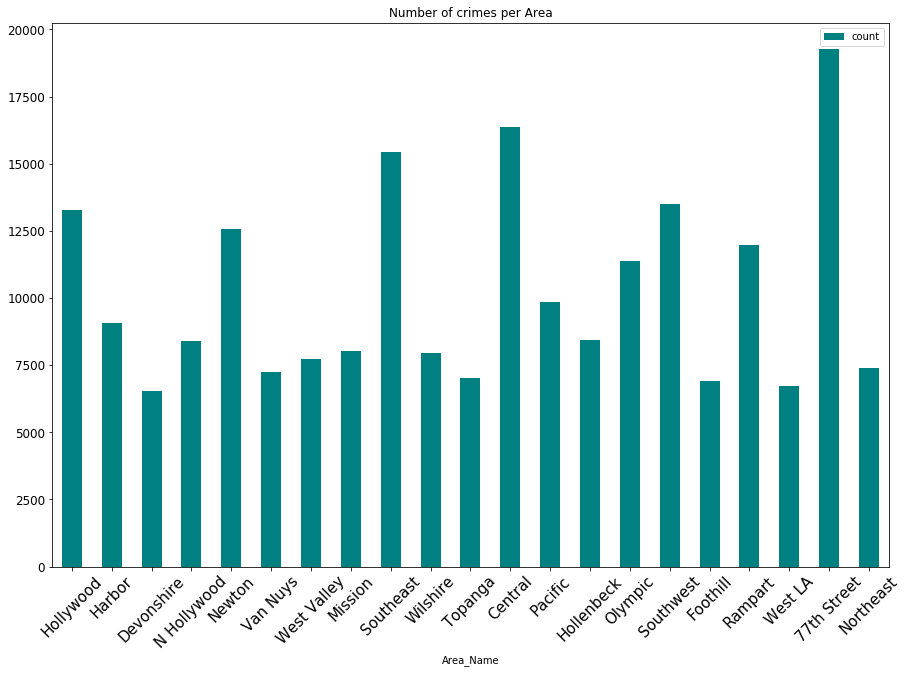

In [27]:
area_pandas = area.toPandas()

area_pandas.plot.bar(x='Area_Name', y='count',
              title='Number of crimes per Area', color='teal', figsize=(15, 10))
plt.xticks(rotation=45, fontsize = 15)
plt.yticks(fontsize = 12)

In [20]:
#•	What weapon has been used the most to commit the crimes?

weapon = la_crime_parquet.groupBy("Weapon_Description").count()
weapon.sort(desc("count")).show()

+--------------------+------+
|  Weapon_Description| count|
+--------------------+------+
|STRONG-ARM (HANDS...|115388|
|UNKNOWN WEAPON/OT...| 22121|
|       VERBAL THREAT| 15591|
|            HAND GUN| 13331|
|SEMI-AUTOMATIC PI...|  4990|
|KNIFE WITH BLADE ...|  4506|
|     UNKNOWN FIREARM|  4498|
|         OTHER KNIFE|  3849|
|   MACE/PEPPER SPRAY|  2399|
|             VEHICLE|  2175|
|  ROCK/THROWN OBJECT|  1927|
|     PIPE/METAL PIPE|  1706|
|              BOTTLE|  1667|
|               STICK|  1589|
|       FOLDING KNIFE|  1513|
|            CLUB/BAT|  1439|
|AIR PISTOL/REVOLV...|  1289|
|       KITCHEN KNIFE|  1268|
|KNIFE WITH BLADE ...|  1150|
|    BLUNT INSTRUMENT|   974|
+--------------------+------+
only showing top 20 rows



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77]),
 <a list of 78 Text yticklabel objects>)

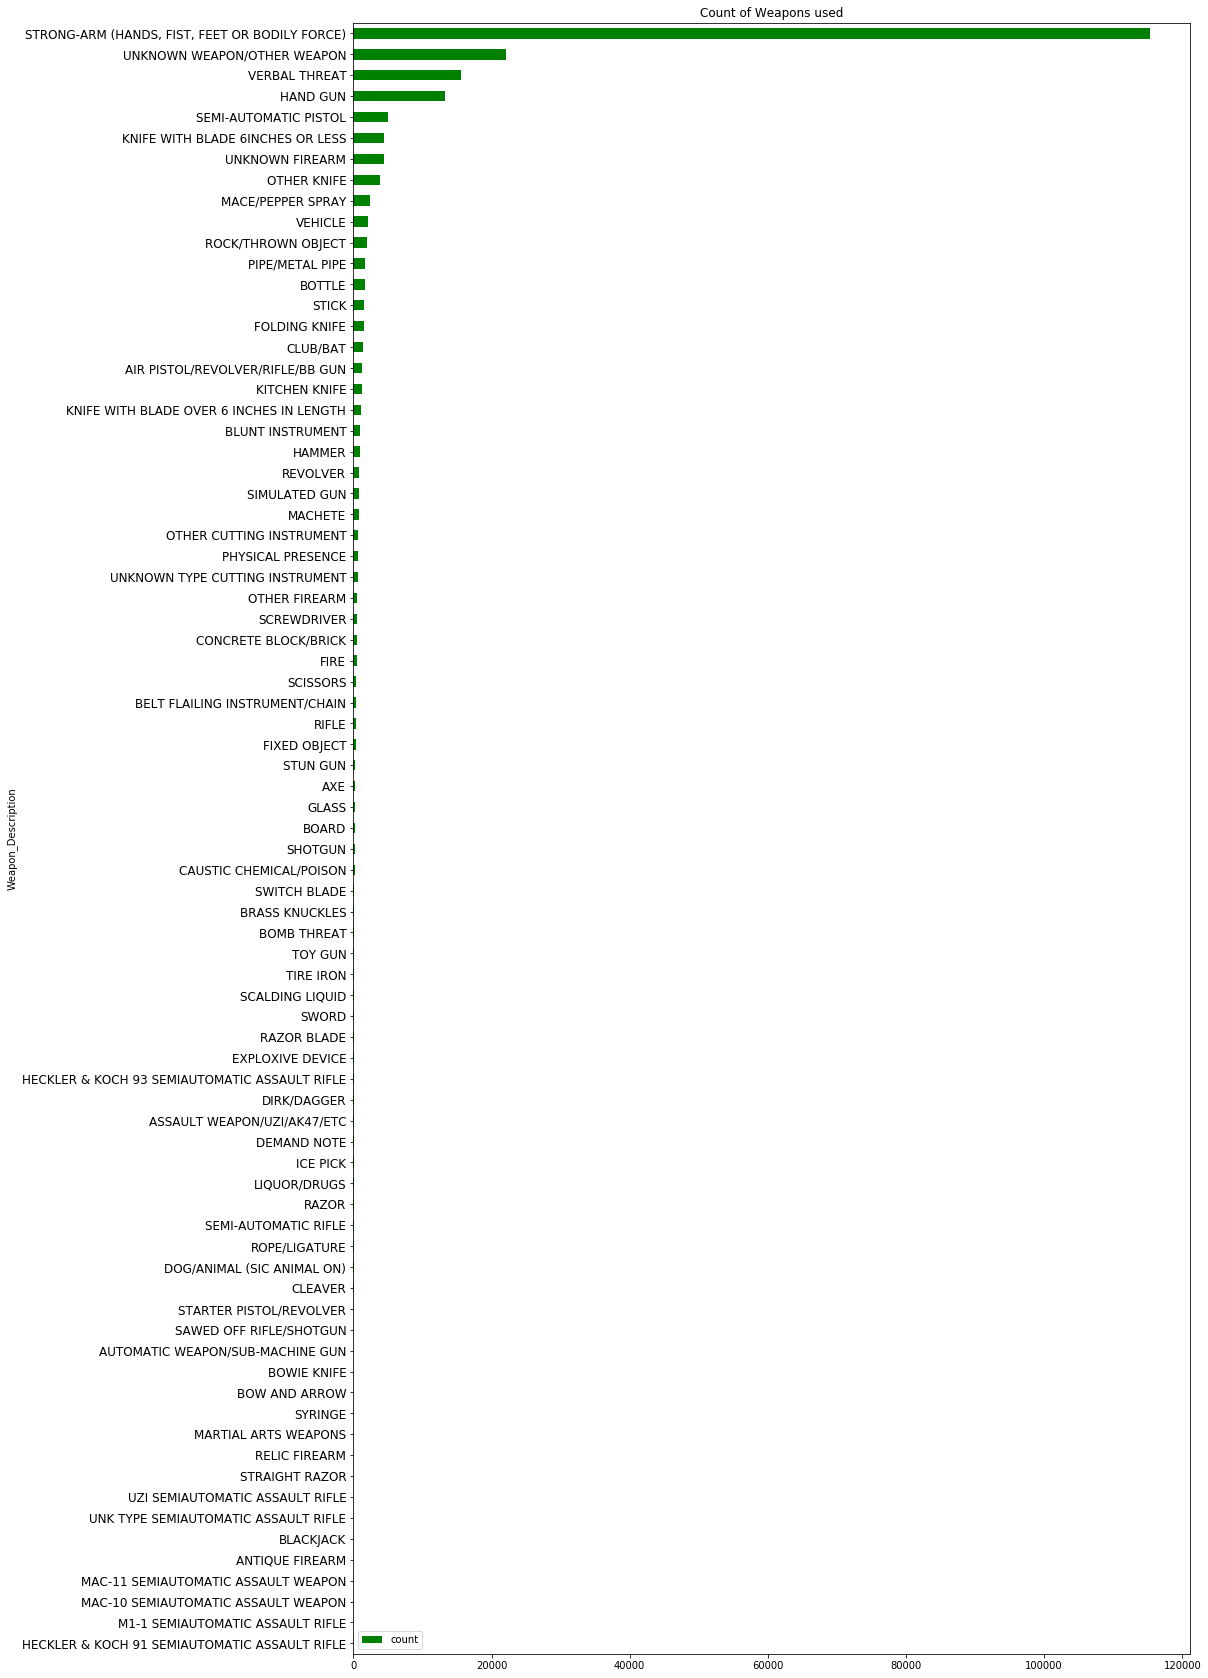

In [26]:
weapon_pandas = weapon.toPandas()

# Plot a bar chart

weapon_pandas_sorted = weapon_pandas.sort_values('count')
weapon_pandas_sorted.plot.barh(x='Weapon_Description', y='count',
              title='Count of Weapons used', color='green', figsize=(15, 30))
plt.yticks(fontsize = 12)

In [21]:
#•	What is the rate of prosecution for each of the crime types?

arrest = la_crime_parquet.groupBy("Status_Description").count()
arrest.sort(desc("count")).show()

+------------------+------+
|Status_Description| count|
+------------------+------+
|       Invest Cont|130846|
|       Adult Other| 47593|
|      Adult Arrest| 34544|
|        Juv Arrest|  1491|
|         Juv Other|   685|
+------------------+------+



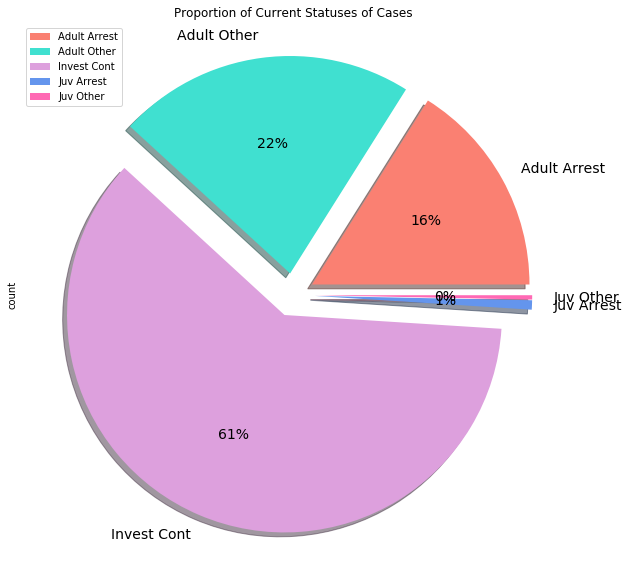

In [22]:
arrest_pandas = arrest.toPandas()

explode = (0.1,0.1,0.1,0.1,0.1)
arrest_pandas.groupby(['Status_Description']).sum().plot(kind='pie', y='count', autopct='%1.0f%%',
                                colors = ['Salmon','Turquoise','Plum','Cornflowerblue','HotPink'],
                                explode = explode,
                                shadow = True,
                                figsize=(10,10),
                                textprops={'fontsize': 14},
                                title='Proportion of Current Statuses of Cases')

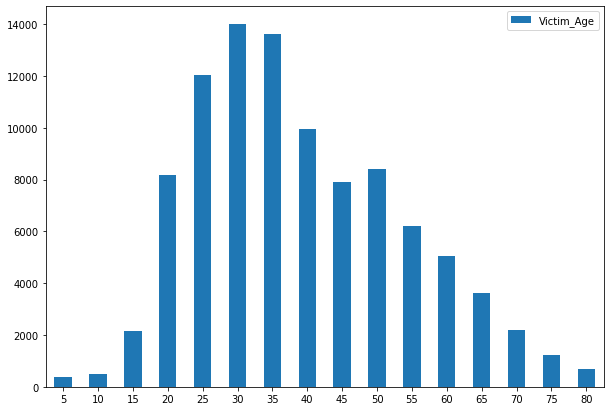

In [23]:
v_age = [378, 502, 2161, 8184, 12048, 13986, 13605, 9961, 7904, 8399, 6221, 5061, 3621, 2191, 1235, 674]
index = ['5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '60', '65', '70', '75', '80'] 
df = pd.DataFrame({'Victim_Age': v_age},
                   index = index)
ax = df.plot.bar(rot=0, figsize=(10, 7))

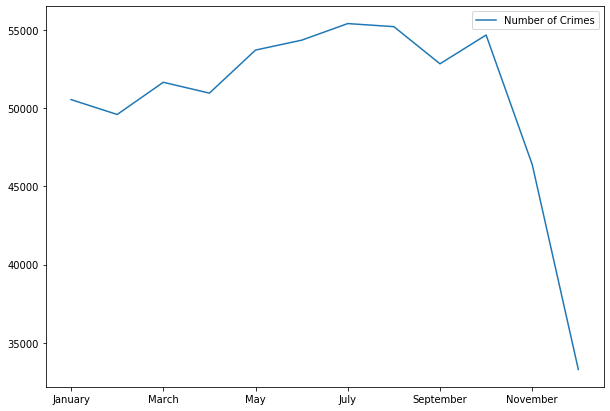

In [24]:
count = [50543, 49592, 51651, 50957, 53710, 54342, 55404, 55207, 52832, 54673, 46394, 33287]
index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] 
df1 = pd.DataFrame({'Number of Crimes': count},
                   index = index)

df1.plot.line(figsize=(10, 7))

In [11]:
# String Indexing

from pyspark.ml.feature import StringIndexer

Area_Name_indexer = StringIndexer(inputCol="Area_Name", outputCol="Area_Name_index")
la_crime_parquet = Area_Name_indexer.fit(la_crime_parquet).transform(la_crime_parquet)

Date_Occurred_indexer = StringIndexer(inputCol="Date_Occurred", outputCol="Date_Occurred_index")
la_crime_parquet = Date_Occurred_indexer.fit(la_crime_parquet).transform(la_crime_parquet)

Date_Reported_indexer = StringIndexer(inputCol="Date_Reported", outputCol="Date_Reported_index")
la_crime_parquet = Date_Reported_indexer.fit(la_crime_parquet).transform(la_crime_parquet)

Crime_Code_Description_indexer = StringIndexer(inputCol="Crime_Code_Description", outputCol="Crime_Code_Description_index")
la_crime_parquet = Crime_Code_Description_indexer.fit(la_crime_parquet).transform(la_crime_parquet)

Victim_Sex_indexer = StringIndexer(inputCol="Victim_Sex", outputCol="Victim_Sex_index")
la_crime_parquet = Victim_Sex_indexer.fit(la_crime_parquet).transform(la_crime_parquet)

Premises_Description_indexer = StringIndexer(inputCol="Premises_Description", outputCol="Premises_Description_index")
la_crime_parquet = Premises_Description_indexer.fit(la_crime_parquet).transform(la_crime_parquet)

Weapon_Description_indexer = StringIndexer(inputCol="Weapon_Description", outputCol="Weapon_Description_index")
la_crime_parquet = Weapon_Description_indexer.fit(la_crime_parquet).transform(la_crime_parquet)

Status_Description_indexer = StringIndexer(inputCol="Status_Description", outputCol="Status_Description_index")
la_crime_parquet = Status_Description_indexer.fit(la_crime_parquet).transform(la_crime_parquet)

In [31]:
la_crime_parquet.printSchema()

root
 |-- Date_Reported: string (nullable = true)
 |-- Date_Occurred: string (nullable = true)
 |-- Time_Occurred: integer (nullable = true)
 |-- AREA: integer (nullable = true)
 |-- Area_Name: string (nullable = true)
 |-- Reported_District_No: integer (nullable = true)
 |-- Crime_Code: integer (nullable = true)
 |-- Crime_Code_Description: string (nullable = true)
 |-- Victim_Age: integer (nullable = true)
 |-- Victim_Sex: string (nullable = true)
 |-- Premises_Code: integer (nullable = true)
 |-- Premises_Description: string (nullable = true)
 |-- Weapon_Used_Code: integer (nullable = true)
 |-- Weapon_Description: string (nullable = true)
 |-- Status_Description: string (nullable = true)
 |-- Area_Name_index: double (nullable = false)
 |-- Date_Occurred_index: double (nullable = false)
 |-- Date_Reported_index: double (nullable = false)
 |-- Crime_Code_Description_index: double (nullable = false)
 |-- Victim_Sex_index: double (nullable = false)
 |-- Premises_Description_index: doub

In [12]:
ML_columns = ['Time_Occurred', 'AREA', 'Reported_District_No', 'Crime_Code', 'Victim_Age', 'Premises_Code', 'Weapon_Used_Code', 'Area_Name_index', 'Date_Occurred_index', 'Date_Reported_index', 'Crime_Code_Description_index', 'Premises_Description_index', 'Weapon_Description_index', 'Status_Description_index']

In [13]:
#Vector Assembler

from pyspark.ml.feature import VectorAssembler
vector_assembler = VectorAssembler(inputCols = ML_columns, outputCol = 'features')

In [15]:
assembled_df = vector_assembler.transform(la_crime_parquet)

assembled_df.select("features").show(10)

+--------------------+
|            features|
+--------------------+
|[1700.0,21.0,2177...|
|[1130.0,20.0,2074...|
|[2050.0,18.0,1842...|
|[1600.0,18.0,1837...|
|[1150.0,12.0,1283...|
|[2100.0,20.0,2069...|
|[2245.0,19.0,1993...|
|[2300.0,14.0,1407...|
|[15.0,14.0,1496.0...|
|[125.0,18.0,1802....|
+--------------------+
only showing top 10 rows



In [35]:
train, test = assembled_df.randomSplit([0.7,0.3])

In [36]:
train.count()

150651

In [37]:
test.count()

64508

In [38]:
###LOGISTIC REGRESSION - VICTIM GENDER

from pyspark.ml.classification import LogisticRegression

In [39]:
LR = LogisticRegression(featuresCol = 'features', labelCol = 'Victim_Sex_index')
LR_model = LR.fit(train)

LR_pred = LR_model.transform(test)

LR_pred.select('prediction', 'Victim_Sex_index').show()

+----------+----------------+
|prediction|Victim_Sex_index|
+----------+----------------+
|       1.0|             1.0|
|       0.0|             1.0|
|       0.0|             0.0|
|       0.0|             1.0|
|       0.0|             0.0|
|       1.0|             1.0|
|       1.0|             0.0|
|       0.0|             0.0|
|       1.0|             0.0|
|       1.0|             0.0|
|       1.0|             1.0|
|       1.0|             2.0|
|       0.0|             1.0|
|       1.0|             0.0|
|       0.0|             1.0|
|       1.0|             0.0|
|       0.0|             0.0|
|       1.0|             0.0|
|       1.0|             1.0|
|       0.0|             0.0|
+----------+----------------+
only showing top 20 rows



In [40]:
#### Model Evaluation

from pyspark.ml.evaluation import MulticlassClassificationEvaluator

LR_evaluator = MulticlassClassificationEvaluator(labelCol = 'Victim_Sex_index', metricName = 'accuracy')
LR_evaluator.evaluate(LR_pred)

0.6215663173559869

In [41]:
from pyspark.mllib.evaluation import MulticlassMetrics

In [42]:
LR_metrics = MulticlassMetrics(LR_pred['Victim_Sex_index','prediction'].rdd)

print("Accuracy:", LR_metrics.accuracy)
print("Recall", LR_metrics.recall(1.0))
print("Fmeasure:", LR_metrics.fMeasure(1.0))
print("Precision:", LR_metrics.precision(1.0))
print("True Positive Rate", LR_metrics.truePositiveRate(1.0))

Accuracy: 0.6215663173559869
Recall 0.6203598582585063
Fmeasure: 0.6138135275896109
Precision: 0.607403914171186
True Positive Rate 0.6203598582585063


In [43]:
###LOGISTIC REGRESSION - CRIME CODE

LR_crmcode = LogisticRegression(featuresCol = 'features', labelCol = 'Crime_Code_Description_index')
LR_model_crmcode = LR_crmcode.fit(train)

LR_pred_crmcode = LR_model_crmcode.transform(test)
LR_pred_crmcode.select('prediction', 'Crime_Code_Description_index').show()

+----------+----------------------------+
|prediction|Crime_Code_Description_index|
+----------+----------------------------+
|       2.0|                         2.0|
|       0.0|                         0.0|
|       3.0|                         3.0|
|       5.0|                         5.0|
|       1.0|                         1.0|
|       0.0|                         0.0|
|       2.0|                         2.0|
|      14.0|                         9.0|
|       0.0|                         0.0|
|       2.0|                         2.0|
|      22.0|                        19.0|
|       8.0|                         8.0|
|       6.0|                         6.0|
|       2.0|                         5.0|
|       2.0|                         2.0|
|       5.0|                         5.0|
|       3.0|                         3.0|
|       2.0|                         2.0|
|       4.0|                         4.0|
|       1.0|                         1.0|
+----------+----------------------

In [44]:
#### Model Evaluation

LR_evaluator_crmcode = MulticlassClassificationEvaluator(labelCol = 'Crime_Code_Description_index', metricName = 'accuracy')
LR_evaluator_crmcode.evaluate(LR_pred_crmcode)

0.9352793451974949

In [45]:
LR_metrics_crmcd = MulticlassMetrics(LR_pred_crmcode['Crime_Code_Description_index','prediction'].rdd)

print("Accuracy:", LR_metrics_crmcd.accuracy)
print("Recall", LR_metrics_crmcd.recall(1.0))
print("Fmeasure:", LR_metrics_crmcd.fMeasure(1.0))
print("Precision:", LR_metrics_crmcd.precision(1.0))
print("True Positive Rate", LR_metrics_crmcd.truePositiveRate(1.0))

Accuracy: 0.9352793451974949
Recall 1.0
Fmeasure: 0.9980421405929517
Precision: 0.9960919326323625
True Positive Rate 1.0


In [46]:
###LOGISTIC REGRESSION - CASE STATUS

LR_status = LogisticRegression(featuresCol = 'features', labelCol = 'Status_Description_index')
LR_model_status = LR_status.fit(train)

LR_pred_status = LR_model_status.transform(test)
LR_pred_status.select('prediction', 'Status_Description_index').show()

+----------+------------------------+
|prediction|Status_Description_index|
+----------+------------------------+
|       1.0|                     1.0|
|       0.0|                     0.0|
|       0.0|                     0.0|
|       0.0|                     0.0|
|       0.0|                     0.0|
|       0.0|                     0.0|
|       1.0|                     1.0|
|       0.0|                     0.0|
|       1.0|                     1.0|
|       1.0|                     1.0|
|       0.0|                     0.0|
|       0.0|                     0.0|
|       1.0|                     1.0|
|       2.0|                     2.0|
|       0.0|                     0.0|
|       1.0|                     1.0|
|       1.0|                     1.0|
|       1.0|                     1.0|
|       2.0|                     2.0|
|       1.0|                     1.0|
+----------+------------------------+
only showing top 20 rows



In [47]:
LR_evaluator_status = MulticlassClassificationEvaluator(labelCol = 'Status_Description_index', metricName = 'accuracy')
LR_evaluator_status.evaluate(LR_pred_status)

1.0

In [48]:
LR_metrics_status = MulticlassMetrics(LR_pred_status['Status_Description_index','prediction'].rdd)

print("Accuracy:", LR_metrics_status.accuracy)
print("Recall", LR_metrics_status.recall(1.0))
print("Fmeasure:", LR_metrics_status.fMeasure(1.0))
print("Precision:", LR_metrics_status.precision(1.0))
print("True Positive Rate", LR_metrics_status.truePositiveRate(1.0))

Accuracy: 1.0
Recall 1.0
Fmeasure: 1.0
Precision: 1.0
True Positive Rate 1.0


In [49]:
###LOGISTIC REGRESSION - WEAPON

LR_weapon = LogisticRegression(featuresCol = 'features', labelCol = 'Weapon_Description_index')
LR_model_weapon = LR_weapon.fit(train)

LR_pred_weapon = LR_model_weapon.transform(test)
LR_pred_weapon.select('prediction', 'Weapon_Description_index').show()

+----------+------------------------+
|prediction|Weapon_Description_index|
+----------+------------------------+
|       0.0|                     0.0|
|       0.0|                     0.0|
|       0.0|                     0.0|
|       3.0|                     3.0|
|       0.0|                     0.0|
|       0.0|                     0.0|
|       0.0|                     0.0|
|       0.0|                     0.0|
|       0.0|                     0.0|
|       0.0|                     0.0|
|       0.0|                     0.0|
|       0.0|                     0.0|
|      12.0|                    12.0|
|       1.0|                     1.0|
|       0.0|                     0.0|
|       0.0|                     0.0|
|      27.0|                    27.0|
|       0.0|                     0.0|
|       2.0|                     2.0|
|      15.0|                    15.0|
+----------+------------------------+
only showing top 20 rows



In [50]:
LR_evaluator_weapon = MulticlassClassificationEvaluator(labelCol = 'Weapon_Description_index', metricName = 'accuracy')
LR_evaluator_weapon.evaluate(LR_pred_weapon)

0.9338531654988529

In [51]:
LR_metrics_weapon = MulticlassMetrics(LR_pred_weapon['Weapon_Description_index','prediction'].rdd)

print("Accuracy:", LR_metrics_weapon.accuracy)
print("Recall", LR_metrics_weapon.recall(1.0))
print("Fmeasure:", LR_metrics_weapon.fMeasure(1.0))
print("Precision:", LR_metrics_weapon.precision(1.0))
print("True Positive Rate", LR_metrics_weapon.truePositiveRate(1.0))

Accuracy: 0.9338531654988529
Recall 0.9998491249245625
Fmeasure: 0.9977416440831076
Precision: 0.9956430288461539
True Positive Rate 0.9998491249245625


In [52]:
###LOGISTIC REGRESSION - PREMISES

LR_premises = LogisticRegression(featuresCol = 'features', labelCol = 'Premises_Description_index')
LR_model_premises = LR_premises.fit(train)

LR_pred_premises = LR_model_premises.transform(test)
LR_pred_premises.select('prediction', 'Premises_Description_index').show()

+----------+--------------------------+
|prediction|Premises_Description_index|
+----------+--------------------------+
|       1.0|                       1.0|
|       0.0|                       0.0|
|       6.0|                       9.0|
|       0.0|                       0.0|
|       3.0|                       4.0|
|       1.0|                       1.0|
|       2.0|                       2.0|
|       3.0|                       4.0|
|       1.0|                       1.0|
|       1.0|                       1.0|
|       6.0|                       7.0|
|       2.0|                       2.0|
|       2.0|                       2.0|
|      47.0|                      46.0|
|       3.0|                       4.0|
|       1.0|                       1.0|
|      18.0|                      18.0|
|       1.0|                       1.0|
|       1.0|                       1.0|
|       0.0|                       0.0|
+----------+--------------------------+
only showing top 20 rows



In [53]:
#### Model Evaluation

LR_evaluator_premises = MulticlassClassificationEvaluator(labelCol = 'Premises_Description_index', metricName = 'accuracy')
LR_evaluator_premises.evaluate(LR_pred_premises)

0.7604173125813852

In [54]:
LR_metrics_premises = MulticlassMetrics(LR_pred_premises['Premises_Description_index','prediction'].rdd)

print("Accuracy:", LR_metrics_premises.accuracy)
print("Recall", LR_metrics_premises.recall(1.0))
print("Fmeasure:", LR_metrics_premises.fMeasure(1.0))
print("Precision:", LR_metrics_premises.precision(1.0))
print("True Positive Rate", LR_metrics_premises.truePositiveRate(1.0))

Accuracy: 0.7604173125813852
Recall 0.9200032485990417
Fmeasure: 0.932652725177013
Precision: 0.9456548960681193
True Positive Rate 0.9200032485990417


In [55]:
###LOGISTIC REGRESSION - AREA NAME

LR_area = LogisticRegression(featuresCol = 'features', labelCol = 'Area_Name_index')
LR_model_area = LR_area.fit(train)

LR_pred_area = LR_model_area.transform(test)
LR_pred_area.select('prediction', 'Area_Name_index').show()

+----------+---------------+
|prediction|Area_Name_index|
+----------+---------------+
|      18.0|           18.0|
|       8.0|            8.0|
|       0.0|            0.0|
|       0.0|            0.0|
|       0.0|            0.0|
|       0.0|            0.0|
|      20.0|           20.0|
|       0.0|            0.0|
|       5.0|            5.0|
|       5.0|            5.0|
|       2.0|            2.0|
|       7.0|            7.0|
|       0.0|            0.0|
|      20.0|           20.0|
|      17.0|           17.0|
|       0.0|            0.0|
|       2.0|            2.0|
|       5.0|            5.0|
|      17.0|           17.0|
|      11.0|           11.0|
+----------+---------------+
only showing top 20 rows



In [56]:
LR_evaluator_area = MulticlassClassificationEvaluator(labelCol = 'Area_Name_index', metricName = 'accuracy')
LR_evaluator_area.evaluate(LR_pred_area)

0.9684225212376759

In [57]:
LR_metrics_area = MulticlassMetrics(LR_pred_area['Area_Name_index','prediction'].rdd)

print("Accuracy:", LR_metrics_area.accuracy)
print("Recall", LR_metrics_area.recall(1.0))
print("Fmeasure:", LR_metrics_area.fMeasure(1.0))
print("Precision:", LR_metrics_area.precision(1.0))
print("True Positive Rate", LR_metrics_area.truePositiveRate(1.0))

Accuracy: 0.9684225212376759
Recall 0.9987603305785124
Fmeasure: 0.9868327038889456
Precision: 0.9751866048012912
True Positive Rate 0.9987603305785124


In [59]:
##### MULTIVARIATE LINEAR REGRESSION #####

from pyspark.ml.regression import LinearRegression

In [62]:
# Time Occurred

LReg_time = LinearRegression(featuresCol = 'features', labelCol = 'Time_Occurred')
LReg_model_time = LReg_time.fit(train)

LReg_pred_time = LReg_model_time.transform(test)
LReg_pred_time.select('Time_Occurred', 'prediction', ).show()

+-------------+------------------+
|Time_Occurred|        prediction|
+-------------+------------------+
|           30|29.999999999991424|
|          150|149.99999999998775|
|          200|200.00000000000063|
|          200|200.00000000000645|
|          215|214.99999999999113|
|          215| 215.0000000000061|
|          230|230.00000000000557|
|          300| 300.0000000000007|
|          300|300.00000000000193|
|          300|300.00000000000193|
|          300|299.99999999998937|
|          515|  514.999999999994|
|         1100|1099.9999999999989|
|         1145|1145.0000000000098|
|         1250|1249.9999999999975|
|         1300|1299.9999999999964|
|         1400|1399.9999999999889|
|         1420|1419.9999999999998|
|         1653|1652.9999999999993|
|         1700|1699.9999999999923|
+-------------+------------------+
only showing top 20 rows



In [63]:
LReg_evaluator_time = MulticlassClassificationEvaluator(labelCol = 'Time_Occurred', metricName = 'accuracy')
LReg_evaluator_time.evaluate(LReg_pred_time)

0.014137781360451417

In [64]:
# VICTIM AGE

LReg_age = LinearRegression(featuresCol = 'features', labelCol = 'Victim_Age')
LReg_model_age = LReg_age.fit(train)

LReg_pred_age = LReg_model_age.transform(test)
LReg_pred_age.select('Victim_Age', 'prediction').show()

+----------+--------------------+
|Victim_Age|          prediction|
+----------+--------------------+
|        38|                38.0|
|        26|   26.00000000000001|
|        26|   26.00000000000001|
|        53|  52.999999999999986|
|        23|  23.000000000000014|
|        36|                36.0|
|        27|   27.00000000000001|
|        25|   25.00000000000001|
|        28|   28.00000000000001|
|        32|   32.00000000000001|
|        30|  30.000000000000004|
|         0|3.198534751519499...|
|        25|   25.00000000000001|
|        22|  22.000000000000018|
|        24|  24.000000000000018|
|        40|                40.0|
|        18|  18.000000000000014|
|        33|                33.0|
|        25|  25.000000000000018|
|        30|  30.000000000000004|
+----------+--------------------+
only showing top 20 rows



In [65]:
LReg_evaluator_age = MulticlassClassificationEvaluator(labelCol = 'Victim_Age', metricName = 'accuracy')
LReg_evaluator_age.evaluate(LReg_pred_age)

0.12959632913747132